In [25]:
from module import calcFFT, generateSin, low_pass_filter
import numpy as np
import sounddevice as sd
from scipy.io import wavfile as sf
import matplotlib.pyplot as plt

In [26]:
duration = 5 
f_carrier = 14000
samplerate = 44100

Gravando Audio por 5 segundos
Gravação finalizada


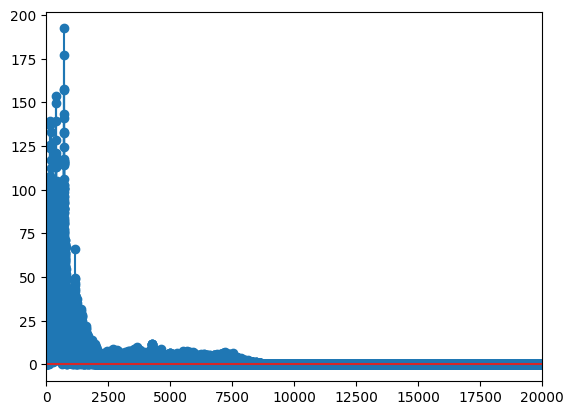

In [27]:
print(f'Gravando Audio por {duration} segundos')
audio = sd.rec(duration*samplerate, samplerate, 2) # Gravando audio
sd.wait()
channel1 = audio[:,0]
print('Gravação finalizada')

freqs, ampls = calcFFT(channel1, samplerate)
plt.plt(freqs, np.abs(ampls))
plt.xlim(0, 20e3)
plt.show()

sf.write('audios/audio.wav', samplerate, audio) # Criando arquivo WAV

In [28]:
samplerate, signal = sf.read('audios/audio.wav') # Lendo o arquivo WAV channel1
time = np.linspace(0, duration, samplerate*duration)
channel1 = signal[:, 0]

normalized = channel1/np.max(np.abs(channel1))
filtred = low_pass_filter(normalized)

_, carrier = generateSin(f_carrier, duration, samplerate)

moduled = filtred*carrier

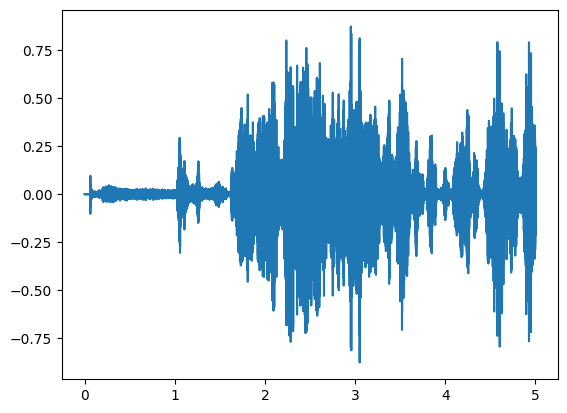

In [29]:
plt.plot(time, moduled)

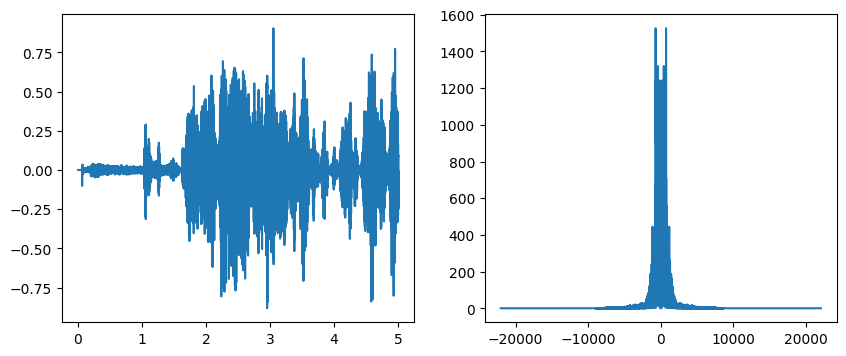

In [30]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(time, filtred)

freqs, ampls = calcFFT(filtred, samplerate)
plt.subplot(122)
plt.plot(freqs, np.abs(ampls))
plt.show()

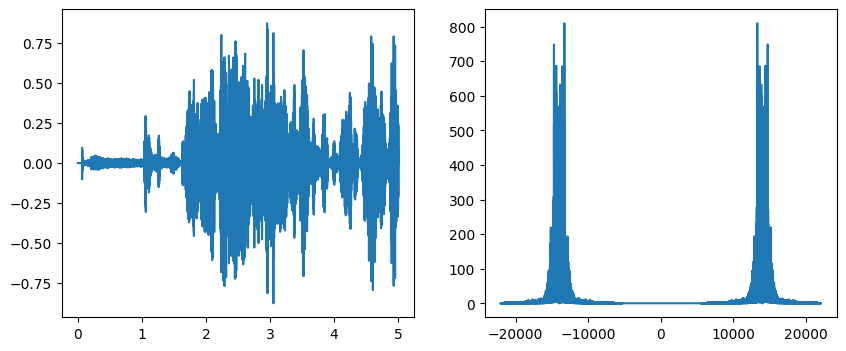

In [31]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(time, moduled)

freqs, ampls = calcFFT(moduled, samplerate)
plt.subplot(122)
plt.plot(freqs, np.abs(ampls))
plt.show()

In [ ]:
sf.write('audios/encoded.wav', samplerate, np.array(moduled)) # Criando arquivo WAV modulado